# Would You Survive the TITANIC?

I'm using a fairly well known data set on the Titanic from Kaggle.com. The data set contains infromation about all the passengers that were on the Titanic such as their Age, Class, etc but more importantly is they survived the sinking of the Titanic

Some Background: The Titanic was a cruise ship that set sail on April 15, 1912. It was claimed to be "unsinkable" with very few life rafts on board. It later hit an iceburg which caused it to sink. Only few survived as there were not enough rafts. However, during the evacuation, women and children were prioritized. 

I am trying to gain some insight about what features contribute to ones survival. i.e who was most likely to survive or die on the titanic based off their features like Age, Fare, Sex, etc. One strong factor we will be looking at is what sex the passenger was because of how the liferafts were mostly provided for women and children.

I will train a logistic regression model to try to predict who is likely to survive. A Logistic regression is a method for classification that allows us to predict a discrete category. By convention it's 1 or 0 for binary classification.

Afterwards, as a fun excercise, with the logistic regression model we will see if you (an undergrad student at UMD) would survive the Titanic.

There will be 6 major sections:
- Basic Exploratory Analysis
- Cleaning dataset/data wrangling
- Logistic Regression ML Model
- Will a college student survive?
- Hypothesis Testing 
- Conclusion

In [39]:
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv('titanic.csv')
df_original = df #used later in the project to look at the original dataframe because df gets altered multiple times
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic Exploratory Analysis

Let's see if we can gain some insight as to who was more likely to survive or die by plotting with respect to these features:

- Passenger Class
- Sex
- Age
- Number of Siblings/Spouses
- Fare cost


[Text(0.5, 1.0, 'Passenger Class')]

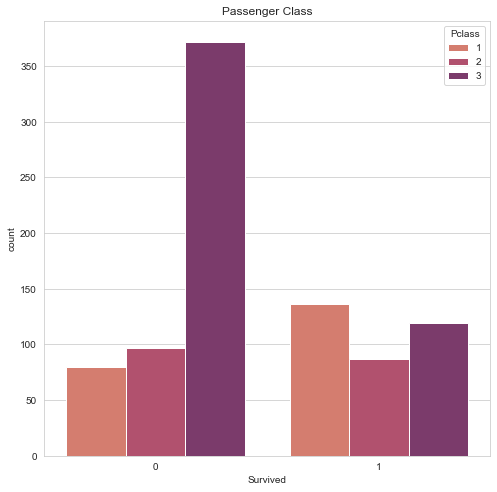

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='Survived',hue='Pclass',palette='flare').set(title='Passenger Class')

We can see that most of the passengers that died are all in 3rd class. This could suggest that if you are a 3rd class passenger you're very likely to die. But keep in mind there are by far the most 3rd class passengers compared to every other passenger class which would suggest a larger number of casualties anyways.

We need to look at the total survivors compared to the deceased with respect to the passenger class. If we look at 1st class, majority of the 1st class passengers survived. For 2nd class, about half survived. Thrid class only about a quarter survived.

[Text(0.5, 1.0, 'Passenger Sex')]

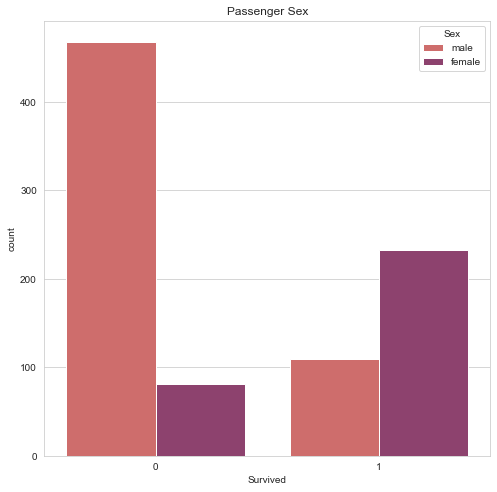

In [42]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='Survived',hue='Sex',palette='flare').set(title='Passenger Sex')

In [43]:
# lets check the proportions of survivors with respect to the 'Sex' feature
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Sex'].count()
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Sex'].count()

total_male = df[(df['Sex'] == 'male')]['Sex'].count()
total_female = df[(df['Sex'] == 'female')]['Sex'].count()

print("Proportion of survivors: ")
print("Proportion of males that survived:   ", male_survived/total_male * 100)
print("Proportion of females that survived: ", female_survived/total_female * 100)

Proportion of survivors: 
Proportion of males that survived:    18.890814558058924
Proportion of females that survived:  74.20382165605095


Just by looking at the graph we can tell that more than 2/3 of the survivors are female

By doing some more calculation we can easily tell that being a passenger being female is more likely to survive than a male passenger.
74.20% for female vs 18.89% for male. Are females significantly more likly to survive compared to the average? We will be doing some hypothesis testing at the end to explore this idea.

[Text(0.5, 1.0, 'Passenger Age Distribution')]

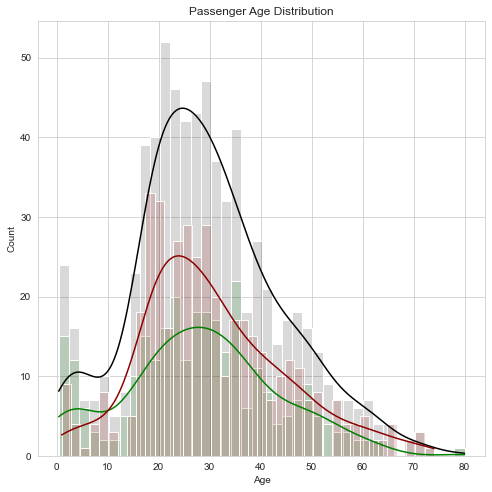

In [44]:
#compare all the ages
plt.figure(figsize=(8, 8))
sns.histplot(df['Age'].dropna(),kde=True,color='black',bins=40, alpha = 0.15)   # total ages
sns.histplot(df[df['Survived'] == True]['Age'],kde=True,color='green',bins=40, alpha = 0.15) #Survived
sns.histplot(df[df['Survived'] == False]['Age'],kde=True,color='darkred',bins=40, alpha = 0.15).set(title='Passenger Age Distribution') #Died


The plot above shows the distribution for age. It also shows the age distribution for those that survived or died. Refer to the key below:

Green line = Distribution for those who Survived

Red line =  Distribution for those who Died

Black line = Total distribution for all the ages

You can see the age distribution is clustered around 20-40 year olds which is shown by a large spike in the black line. However, the green line, which is the survivors, is very flat even though there are the most passengers around those ages. That would suggest that the those between the ages of 20-40 are less likely to survive. 

Another small detail is ages 0-10 where the green line is actually above the red line which would mean more children survived.

This corroborates with first hand witness accounts where during the evactuation it was emphasized that "women and children" go into the life raft first. That would explain why more children were survived (explained by the green line)

<Figure size 576x576 with 0 Axes>

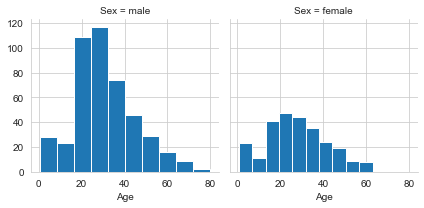

In [45]:
plt.figure(figsize=(8, 8))
g = sns.FacetGrid(data=df,col='Sex')
g.map(plt.hist,'Age')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

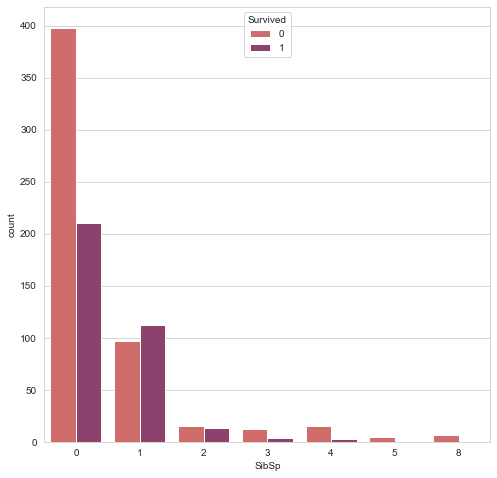

In [46]:
plt.figure(figsize=(8, 8))
sns.countplot(data = df, x='SibSp', hue='Survived', palette='flare')

For the feature number of siblings or spouse, we can see a small detail where a passenger with no sibling or spouse has the most deaths. However, that could be due to just the majority of passengers having no siblings or spouse which would show there being more deaths under that class anyways. Siblings and spouses being a factor for survival is correlated but not neccesarily a causation.

[Text(0.5, 1.0, 'Fare')]

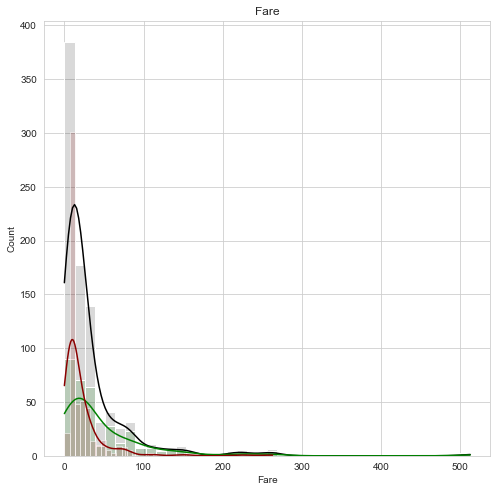

In [47]:
#compare all the ages
plt.figure(figsize=(8, 8))
sns.histplot(df['Fare'].dropna(),kde=True,color='black',bins=40, alpha = 0.15)   # total ages
sns.histplot(df[df['Survived'] == True]['Fare'],kde=True,color='green',bins=40, alpha = 0.15) #Survived
sns.histplot(df[df['Survived'] == False]['Fare'],kde=True,color='darkred',bins=40, alpha = 0.15).set(title='Fare') #Died

The plot above shows the distribution for Fare. It also shows the Fare distribution for those that survived or died. Refer to the key below:

Green line = Distribution for those who Survived

Red line =  Distribution for those who Died

Black line = Total distribution for all the Fares 

You can see around where Fare = 30 the green line intersects with the red line and the green line becomes higher than the red line.

This is actaully very interesting insight. It means that the cheaper Fares less than 30 have significantly more deaths based off the shape and since the red line is above the green line. Once the fare is above 30 the chances of not surviving increases by a lot. This can correlate with wealth and who had more access to liferafts.

Lets run a Pairplot with the passenger's survival highlighted to see if there's any insight.

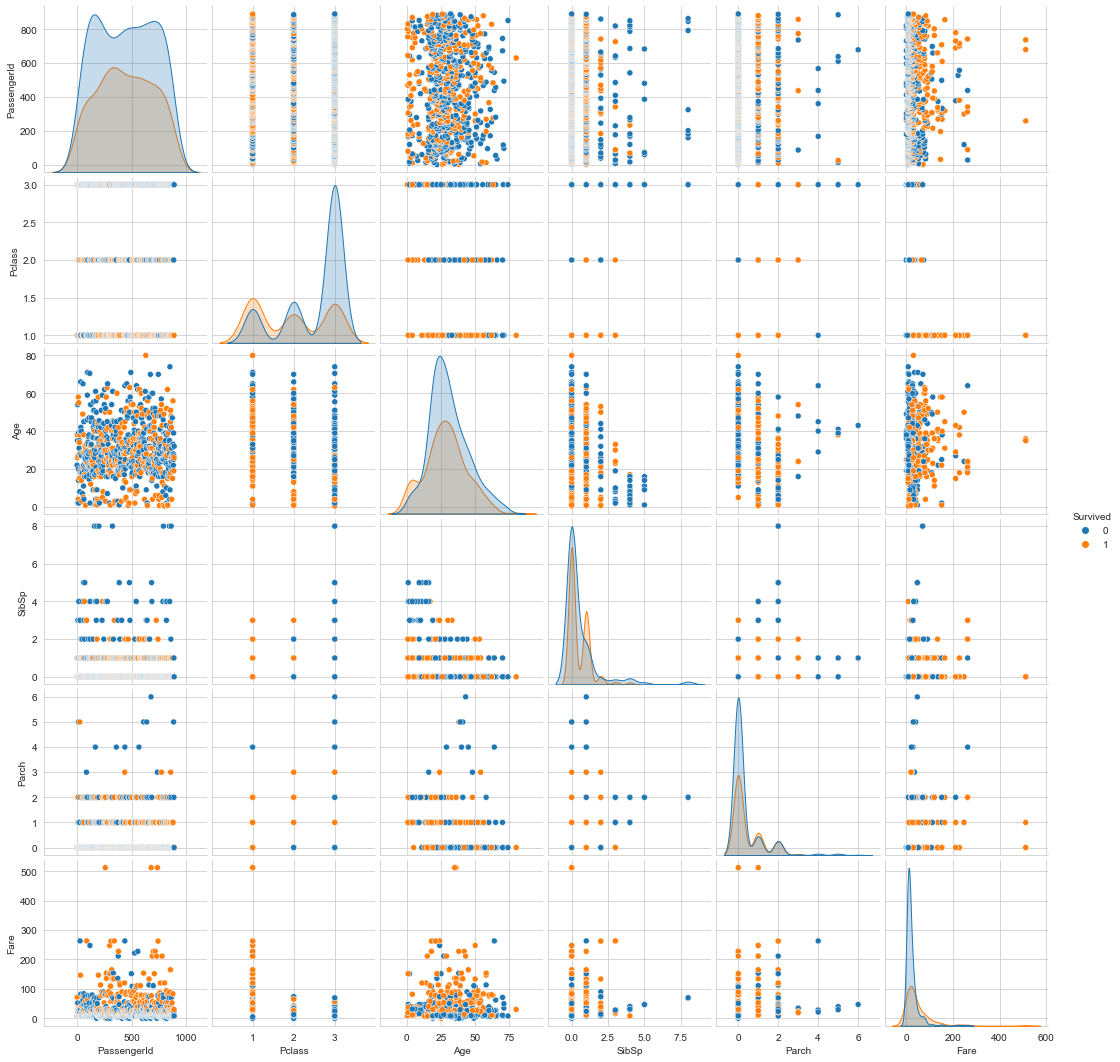

In [48]:
sns.pairplot(df, hue='Survived') # lets see if there's any valuable insight

## Cleaning dataset/data wrangling:

There is a lot of missing information from each class so we will be cleaning up the data

First, let's use a heat map to visiualize where there are missing points or NaN

[Text(0.5, 1.0, 'Where are there NaN values?')]

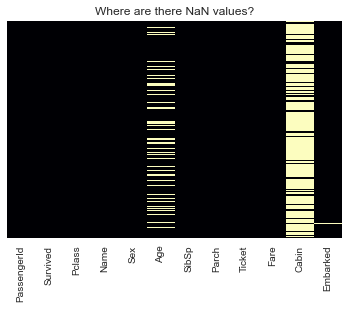

In [49]:
bool_matrix = df.isnull()   #turn into boolean matrix of true or falses first
sns.heatmap(bool_matrix,cbar=False, yticklabels=False,cmap='magma').set(title='Where are there NaN values?') # where there is a tick indicates if the value there is Nan

We can see the only features that have missing values are "Age" and "Cabin" and "Embarked". We do want to keep these columns as they are useful for additional insight.

Let's check out what the proportion of missing values are for both those features so that we can figure out what to do with those features.

In [50]:
nan_age_count = bool_matrix[bool_matrix['Age'] == True]['Age'].count()     #how many values in the df are NaN
age_count = bool_matrix[bool_matrix['Age'] == False]['Age'].count()

nan_cabin_count = bool_matrix[bool_matrix['Cabin'] == True]['Age'].count()     #how many values in the df are NaN
cabin_count = bool_matrix[bool_matrix['Cabin'] == False]['Age'].count()

print("Proportion missing Ages")
print("# of NaN's:      ", nan_age_count)   
print("# of not NaN:    ", age_count)
print("% of NaN's:      ", nan_age_count/(age_count + nan_age_count) * 100)
print()

print("Proportion of missing Cabins")
print("# of NaN's:      ", nan_cabin_count)   
print("# of not NaN:    ", cabin_count)
print("% of NaN's:      ", nan_cabin_count/(cabin_count + nan_cabin_count) * 100)

Proportion missing Ages
# of NaN's:       177
# of not NaN:     714
% of NaN's:       19.865319865319865

Proportion of missing Cabins
# of NaN's:       687
# of not NaN:     204
% of NaN's:       77.10437710437711


We can see that about 20% of the ages are missing from the data frame. We could delete those passengers but we forfeit a lot of valuable information if we do so. So lets do imputation in the next part.

For missing cabins, there is so much missing information, 77%. We are better off just removing that feature itself as to not throw off the analysis.


In [51]:
df = df.drop('Cabin',axis=1) #remove entire column

Let's impute for the Age column by filling in with the mean. More specifically lets use the average for each class to be more accurate

First, lets see what the average age for each passenger class is.

Average Age for each pasenger class
PClass 1:  38.233440860215055
PClass 2:  29.87763005780347
PClass 3:  25.14061971830986



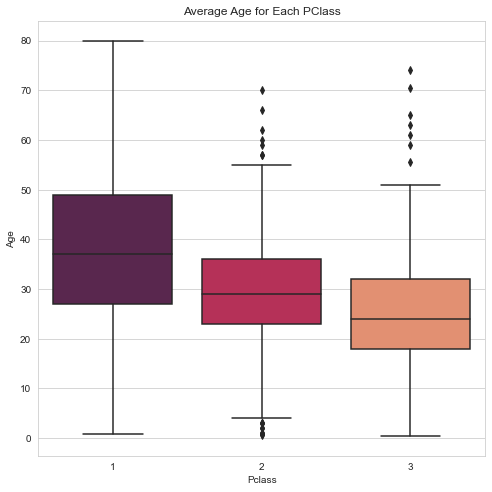

In [52]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df,x='Pclass',y='Age',palette='rocket').set(title='Average Age for Each PClass')
print("Average Age for each pasenger class")
print("PClass 1: ", (df[(df['Pclass'] == 1)]['Age']).mean())
print("PClass 2: ", (df[(df['Pclass'] == 2)]['Age']).mean())
print("PClass 3: ", (df[(df['Pclass'] == 3)]['Age']).mean())
print()

Let's create a function that replaces the NaN values with the average for the passengers class

In [53]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if not pd.isnull(Age):
        return Age

    if Pclass == 1:
        return 38.233
    elif Pclass == 2:
        return 29.878
    else:
        return 25.141


In [54]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1) #replace all the NaN values with their corresponding averge based off the class

#### Cleaning "Embarked" column:

Lets clean the Embarked column. You can see below that there are two passengers that have NaN for Embarked. Lets fill in the NaN values with values that are most similar to that individual.

In [55]:
df[df['Embarked'].isna()] # quickly see who is NaN for embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [56]:
df[(df['Pclass'] == 1) & (df['Age'] == 38) & (df['Sex'] == 'female')] #check for other similar passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,NaN
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C


In [57]:
df[(df['Age'] < 65) & (df['Age'] >60) & (df['Sex'] == 'female')] #check for other similar passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,NaN


Lets replace passenger 61 with the most similar passengers to her which would make Embarked = 'C'
Lets repalce passenger 829 with the most similar passengers which would be S

Lets do one more visualization to see if we've cleared all the NaN's and the data is ready to work with

In [58]:
df.at[61,'Embarked'] = 'C'
df.at[829,'Embarked'] = 'S'

[Text(0.5, 1.0, 'Wherer are there NaN Values?')]

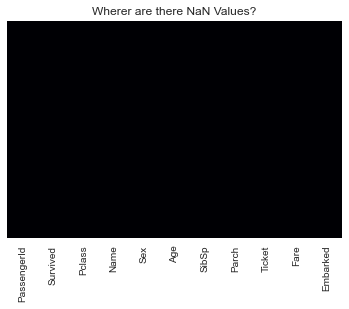

In [59]:
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap='magma').set(title='Wherer are there NaN Values?') # where there is a tick indicates if the value there is Nan

We are about to use a Machine learning algorithm on the model. However, we still have a few categorical variables such as sex. We need to turn them into dummy variables, i.e 1 for male 0 for female, otherwise the algorithm wont be able to use it as input.

One thing to keep in mind is when we create a dummy column, we have to drop one of the columns otherwise we will have a prob called multi conlinearity. In other words if we don't drop one of the columns, they will we perfect predictors of eachother.

In [60]:
df.info() #which ones are not numerical values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.141,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.0000,C


In [62]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True) #must drop one of the columns otherwise it will predict the other perfectly
sex = pd.get_dummies(df['Sex'],drop_first=True) #same here

#'name' and 'ticket'  and 'PassengerId' aren't factors in survival so we drop them, don't need 'Sex' or 'embarked' because they got dummies now. 
df.drop(['Name','Ticket', 'PassengerId', 'Sex','Embarked'],axis=1,inplace=True) 

train = pd.concat([df, embarked, sex],axis=1) #lets put the rest of the df together with the new dummies
train.head() # lets see if everything is numerical now

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [63]:
df.info() #which ones are not numerical values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


## Logistic Regression ML Model

Lets split up our data set with 70% as the training and we can test on 30% of it to see roughly how accurate we are

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [65]:
X = train.drop('Survived', axis = 1) #every other row except survive
y = train['Survived']   #what we're trying to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

log = LogisticRegression()
log = LogisticRegression(solver='lbfgs', max_iter=10000) #need to increase iteration otherwise lbfgs fails to converge
log.fit(X_train,y_train)

pred = log.predict(X_test)

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [67]:
confusion_matrix(y_test, pred)

array([[138,  19],
       [ 30,  81]], dtype=int64)

The classification report showsthat the accuracy is not too bad with around 80% accuracy across the board. The precision is the ability to identify relevant data points, it expresses proportion of data points model says relevant is actually relevant. Recall is the ability of a model to find relevant cases in a data set. F1-Score combines these two and is the harmonic mean of precision and recall. So it punishes extreme differences. F1 -Score is pretty good in this case which would make our Logistic model good enough to use.

You can also see in the confusion matrix that there are a few type I and type II errors. What it means in context of this scenereo is a passenger is for a type II error is a passenger that survived but is classified as dead. And type I is a passenger that died but classified as alive. That would be worse in this case because lets say you are trying to report this news. Its worse to classify someone as alive when they are actually dead

## Would You Survive?

This is a fun excercise to see if the typical modern day college student would survive being on the titanic. I am taking on a few assumptions which you will see below (like students being poor and bringing friends to go with)

Let's say you are the typical college student going on the Titanic. The Titanic is like fun cruise trip for you during your spring break, maybe almost like Royale Caribbean cruise trip. Being a college student, you don't have much funds. You are likely to go with a few friends (if you have any) instead of Sibling or Spouse. Most college students try to save some money by booking rooms together to fit more friends. You have less spending money on Fares.

Here are the assumption below and the reasoning.

Passenger class: 3  - because there's no way a college student is paying for 2nd or 1st class nor have the connections

Age: 20             - Average age of college student

SibSp:  3           - You're probably going on the cruise with a few friends which we will assume is equivilent to siblings or spouse. 

Sex: M/F            - We'll try both to see what the odds are for each

Fare:               - We'll calculate the average Fare below for pclass 3 and go on the lower end of the spectrum because college students wouldn't spend as much compared to a working adult.

Parch:              - Assuming no parents or children aboard

Let's run some code to determine which values to pick for some of the features based off other similar passengers

In [68]:
#figure out which 'Embarked' we should pick based off whats most common for a 18-22 yo 3rd class passenger
df_original[(df_original['Pclass'] == 3) & (df_original['Age'] > 18) & (df_original['Age'] < 22)]['Embarked'].mode()

#lets use 'S'

0    S
Name: Embarked, dtype: object

In [69]:
# What is the lower quartile for a Fare for 3rd class passengers and 18-22 yo
df_original[(df_original['Pclass'] == 3) & (df_original['Age'] > 18) & (df_original['Age'] < 22)]['Fare'].describe()

#lets use 7.78

count    47.000000
mean      8.895566
std       4.497856
min       0.000000
25%       7.775000
50%       7.925000
75%       8.662500
max      34.375000
Name: Fare, dtype: float64

In [70]:
student = {'Pclass' : [3,3,3,3,3,3], 'Age' : [20,20,20,20,20,20], 'SibSp' : [0,0,3,3,6,6], 'Parch': [0,0,0,0,0,0], 'Fare': [7.78,7.78,7.78,7.78,7.78,7.78], 'Q': [0,0,0,0,0,0], 'S' : [1,1,1,1,1,1], 'male' : [1,0,1,0,1,0] }
student_df = pd.DataFrame(student)
student_df

#datafram for typical Female or male students

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,20,0,0,7.78,0,1,1
1,3,20,0,0,7.78,0,1,0
2,3,20,3,0,7.78,0,1,1
3,3,20,3,0,7.78,0,1,0
4,3,20,6,0,7.78,0,1,1
5,3,20,6,0,7.78,0,1,0


Based on the data frame above we'll simulate one male college student and one female college student

In [71]:
pred_II = pred = log.predict(student_df)
pd.DataFrame(pred_II, ['male: no friends', 'female: no friends', 'male w/ 3 friends', 'female w/ 3 friends', 'male: group of friends ', 'female: group of friends'], ['survived?'])

,survived?
male: no friends,0
female: no friends,1
male w/ 3 friends,0
female w/ 3 friends,0
male: group of friends,0
female: group of friends,0


It looks like if you're a female student in college who wants to go on a spring break trip on a cruise all by yourself, you are the most likely to survive.

It looks like the odds for a college student surviving is very unlikely. Obviously this is taken with a grain of salt since there were a lot of assumptions like how much money a college student would normally spend on a cruise and Siblings or spouse which we repalced siblings with number of friends going.

This is more just a fun excercise but the big idea is that a college student would be one of the least likely to survive the sinking whether they female or male. In general anyone around the age of 20 is less likely to survive.

## Hypothesis testing

We will be comparing the average survival chance of all the passengers to see if being a female has a better than 50% chance of survival.


In [72]:
from statsmodels.stats.weightstats import ztest as ztest

In [73]:
df_original['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [74]:
df_original[df_original['Sex'] == 'female']['Survived'].describe()

count    314.000000
mean       0.742038
std        0.438211
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Null Hypothesis:        H0 <= 0.5

Alternate Hypothesis:   Ha > 0.5

Population Mean:        X = 0.3838

Population Std:         S = 0.0.4866

Population Size:        n = 891

Confidence Interval:    0.99 i.e. a = 0.01

In [75]:
survival_f = df_original[df_original['Sex'] == 'female']['Survived']
ztest(survival_f, value=0.5, alternative='larger') 

(9.787353874894393, 6.37956336231486e-23)

Z-stat: 9.7873

P-value: 6.38E-23

alpha = 0.01

P value < alpha

We rejected the Null Hypothesis in favor for the Alternate Hypothesis. The mean survival for a female is greater than a 0.5 chance



## Conclusion

So we looked at a lot of different features and factors that go into the survival. Based off the exploratory data analysis, the ideal candidate for survival is the following two:

Someone with more wealth, meaning they not in third class (so ideally first class). Someone who spends more on fares is significanly more likely to surivive. Wealth and Age are likely conditionally independent, meaning they are not causations for eachother but they are still tied to each other. To clarify that means people who are older tend to accumulate more wealth. This is seen in the exploratory data anaylsis where those who are older have a proportionally higher rate of survival. We also see that with children which could mean those with children are wealthier and therefore they are more likely to survive. At the same time, witness accounts of the titanic say they prioritized children during the evacuation which is why we see a higher rate of surival for the youngest of the passengers.

Perhaps the biggest factor for survival is being a female passenger. We looked at this in the exploratory data analysis, machine learning model, and the hypothesis testing. Overall about 74% of the female passengers survived. Again, first hand accounts prioritized females to get aboard the liferafts which left many men behind. There were only 14 lifeboats for around 2,000 passengers.

# THANK YOU !